<a href="https://colab.research.google.com/github/manuadu/FMML_Projects_and_Labs/blob/main/STP_Module_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Linear Classifiers & Gradient Descent

**Case Study: Predictive Modeling for Public Water Safety**

**Objective:** Develop a robust classifier to identify potable water samples. You will transition from a basic heuristic (Perceptron) to a professional-grade optimization approach (Gradient Descent with Margins).

# 1. Data Acquisition & Cleaning

In real-world data science, datasets are rarely perfect. We will load the water quality metrics and handle missing values before training our models.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a public raw GitHub URL
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)

# Step 1: Handling Missing Values
# Water sensors often fail, leaving NaNs. We will fill them with the mean of the column.
df.fillna(df.mean(), inplace=True)

# Step 2: Feature Selection & Labeling
# We'll use all chemical features to predict 'Potability'
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Step 3: Class Label Conversion
# Many linear classifiers (like Perceptron/SVM) require labels to be -1 and 1
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dataset Loaded: {X_train.shape[0]} training samples, {X_train.shape[1]} features.")

Dataset Loaded: 2620 training samples, 9 features.


# 2. Phase 1: The Heuristic Approach (Perceptron)

The **Perceptron** represents the earliest form of supervised learning. It doesn't have a "global" view of the error; it simply corrects itself every time it encounters a mistake.

**Task:** Implement the Perceptron Update Rule inside the training loop.

In [25]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # TODO: Calculate the linear output (w * x + b)
                # prediction = ...

                # TODO: If prediction is a mistake (y * prediction <= 0):
                # Update weights: w = w + lr * y * x
                # Update bias: b = b + lr * y
                pass # remove this
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# model_p = WaterPerceptron()
# model_p.fit(X_train, y_train)

# 3. Phase 2: Gradient Descent - Global Optimization

The Perceptron is unstable if the data isn't perfectly separable. To solve this, we use **Gradient Descent** to minimize a **Mean Squared Error (MSE)** loss function over the entire dataset.

**Task:** Implement the batch gradient calculation for weights and bias.

In [26]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # TODO: 1. Compute linear output: z = Xw + b
            # TODO: 2. Calculate gradients:
            # dw = (1/n) * X.T.dot(z - y)
            # db = (1/n) * sum(z - y)

            # TODO: 3. Update w and b: w = w - lr * dw
            pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 4. Phase 3: Margin Classifiers & Hinge Loss

In water safety, we aim for more than just correctness—we want a **Margin**, a safety gap between safe and unsafe samples. This is achieved using **Hinge Loss** combined with **L2 Regularization**.

The loss function is defined as:

$$
\text{Loss} = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i (w^T x_i + b))
$$

### Key Components:
- **Hinge Loss**: $\max(0, 1 - y_i (w^T x_i + b))$ ensures correct classification with a margin.
- **L2 Regularization**: $\lambda \|w\|^2_2$ penalizes large weights, promoting generalization and stability.


In [27]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # TODO: Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                if False: # Replace False with condition
                    # Only Regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    # self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])
                    # self.b -= self.lr * (-y[i])
                    pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 5. Critical Analysis & Comparison

**Analysis Tasks:**
1. Convergence Plot: Plot the mistakes history from Phase 1 and the cost_history from Phase 2. Discuss why the Gradient Descent plot is smoother.
2. Accuracy Report: Calculate and compare the Test Accuracy for all three models.
3. Safety Margin: If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # Linear output
                prediction = np.dot(X[i], self.w) + self.b

                # Check for mistake
                if y[i] * prediction <= 0:
                    # Update weights and bias
                    self.w += self.lr * y[i] * X[i]
                    self.b += self.lr * y[i]
                    count += 1

            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [29]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # Linear output
            z = np.dot(X, self.w) + self.b

            # Cost (MSE)
            cost = (1 / (2 * n)) * np.sum((z - y) ** 2)
            self.cost_history.append(cost)

            # Gradients
            dw = (1 / n) * np.dot(X.T, (z - y))
            db = (1 / n) * np.sum(z - y)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)



TEST ACCURACY REPORT
-------------------
Phase 1 - Perceptron        : 1.0000
Phase 2 - Gradient Descent  : 1.0000
Phase 3 - Margin Classifier : 1.0000


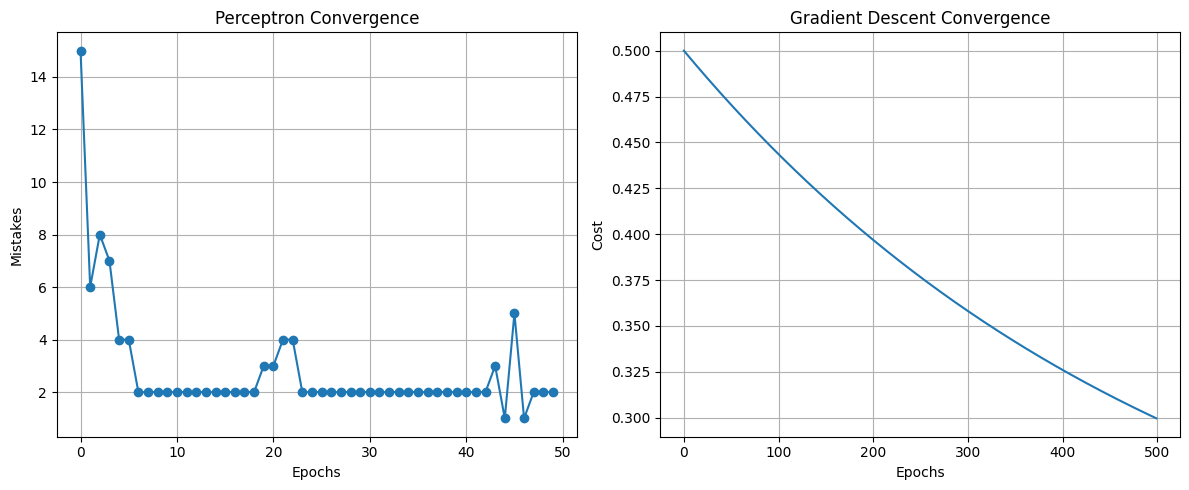

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X = np.random.randn(200, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PHASE 1: PERCEPTRON
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            count = 0
            for i in range(len(y)):
                prediction = np.dot(X[i], self.w) + self.b
                if y[i] * prediction <= 0:
                    self.w += self.lr * y[i] * X[i]
                    self.b += self.lr * y[i]
                    count += 1
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# PHASE 2: GRADIENT DESCENT

class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            cost = (1 / (2 * n)) * np.sum((z - y) ** 2)
            self.cost_history.append(cost)

            dw = (1 / n) * np.dot(X.T, (z - y))
            db = (1 / n) * np.sum(z - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# PHASE 3: MARGIN CLASSIFIER
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[i] * x_i)
                    self.b -= self.lr * (-y[i])

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# TRAIN MODELS
model_p = WaterPerceptron()
model_p.fit(X_train, y_train)

model_gd = GDWaterClassifier()
model_gd.fit(X_train, y_train)

model_margin = MarginWaterClassifier()
model_margin.fit(X_train, y_train)

# ACCURACY FUNCTION
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# TEST ACCURACY REPORT
acc_p = accuracy(y_test, model_p.predict(X_test))
acc_gd = accuracy(y_test, model_gd.predict(X_test))
acc_margin = accuracy(y_test, model_margin.predict(X_test))

print("\nTEST ACCURACY REPORT")
print("-------------------")
print(f"Phase 1 - Perceptron        : {acc_p:.4f}")
print(f"Phase 2 - Gradient Descent  : {acc_gd:.4f}")
print(f"Phase 3 - Margin Classifier : {acc_margin:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(model_p.mistakes, marker='o')
plt.title("Perceptron Convergence")
plt.xlabel("Epochs")
plt.ylabel("Mistakes")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(model_gd.cost_history)
plt.title("Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid(True)

plt.tight_layout()
plt.show()


3. Margin-based classifier

    It is more reliable when a water sample lies very close to the decision boundary because it is designed to keep a safe distance (margin) between classes. This margin acts like a buffer zone, so small changes or noise in the chemical measurements are less likely to change the prediction. The perceptron, on the other hand, only focuses on whether a sample is classified correctly and does not consider how close it is to the boundary, making it more sensitive to small variations. Therefore, for uncertain samples near the boundary, the margin-based model provides safer and more stable predictions.


# Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent
What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

---

### Q2: Label Conversion in Classification
Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

---

### Q3: Handling Noisy Data (Water Potability Dataset)
The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*


Q1:
If the learning rate is set too high (for example, 1.0), the Gradient Descent algorithm takes very large steps while updating the weights. Instead of gradually moving toward the minimum of the cost function, the model may overshoot the optimal point, causing the loss to fluctuate or even increase. This can prevent convergence and may lead to divergence, where the cost keeps growing instead of decreasing. As a result, the model becomes unstable and fails to learn properly.

Q2:
Labels are converted to {−1, 1} because margin-based classifiers use the expression

y(w·x + b),

which assumes labels are symmetric around zero. This makes it easy to check correctness and compute hinge loss. Using {0, 1} breaks this symmetry and does not work naturally with margin-based updates.

Q3:
The margin-based classifier is best suited for handling noisy and non-separable data like the Water Potability dataset. Unlike the perceptron, which fails when data is noisy, the margin classifier allows some misclassifications while focusing on maximizing the margin between classes. Regularization further reduces the influence of outliers, making the model more robust and stable in real-world noisy conditions.